# Recognization of handwritten digits on MNIST dataset by KNN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## step 1 - data prep

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/Datasets/MNIST-2/mnist_train.csv")
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#creating numpy array from panda dataset
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape, Y.shape)

(42000, 784) (42000,)


In [7]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.20)

In [9]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## Visualization of some training data

In [10]:
def drawImg(Sample):
    img = Sample.reshape((28,28))
    plt.imshow(img, cmap="gray")

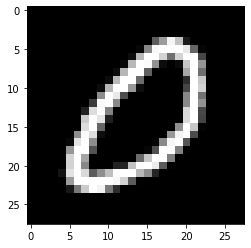

In [11]:
drawImg(X[0])
drawImg(X_train[90])

# step 2 - KNN algo

In [12]:
#creating the distance fun
#Ecuclidian Distance
def distFun(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

#KNN function
def knn(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = distFun(queryPoint, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    
    #then find the nearest k points by slicing
    vals = vals[:k]
    vals = np.array(vals)
    
    #print(vals)
    
    #finding the unique values and their count 
    new_vals = np.unique(vals[:,1], return_counts=True)
    #print(new_vals)
    
    #returning the appropriate label acc to max frequencies
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

# step 3 - making prediction

In [13]:
pred = knn(X_train, Y_train, X_test[0])
print(pred)

6.0


6


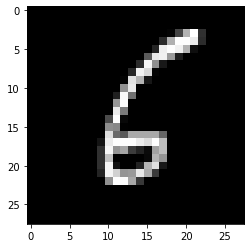

In [14]:
drawImg(X_test[0])
print(Y_test[0])

In [15]:
pred2 = knn(X_train, Y_train, X_test[45])
print(pred2)

1.0


1


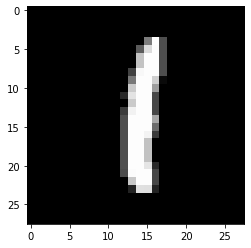

In [16]:
drawImg(X_test[45])
print(Y_test[45])

In [17]:
pred3 = knn(X_train, Y_train, X_test[87])
print(pred3)

7.0


7


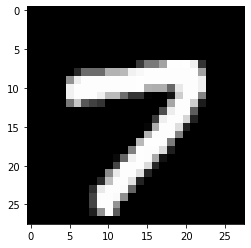

In [18]:
drawImg(X_test[87])
print(Y_test[87])

In [19]:
pred4 = knn(X_train, Y_train, X_test[150])
print(pred4)

4.0


4


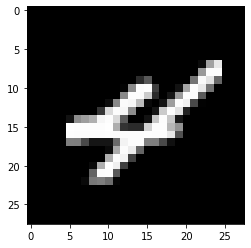

In [20]:
drawImg(X_test[150])
print(Y_test[150])

In [21]:
pred5 = knn(X_train, Y_train, X_test[42])
print(pred5)

9.0


9


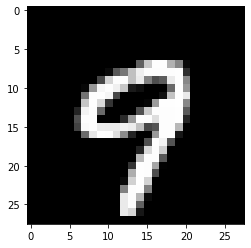

In [23]:
drawImg(X_test[42])
print(Y_test[42])

In [24]:
pred6 = knn(X_train, Y_train, X_test[57])
print(pred6)

3.0


3


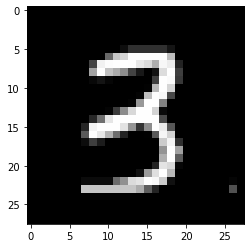

In [25]:
drawImg(X_test[57])
print(Y_test[57])